In [9]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

8


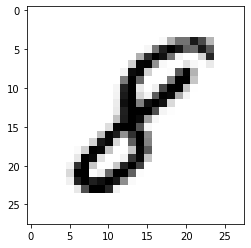

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

In [11]:
x_train.shape

(60000, 28, 28)

In [12]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [13]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

#the final Dense layer must have 10 neurons since 
#we have 10 number classes (0, 1, 2, …, 9)

In [27]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=100)

Epoch 1/100
60000/60000 [==============================] - 28s 469us/step - loss: 0.2045 - accuracy: 0.9398
Epoch 2/100
60000/60000 [==============================] - 27s 457us/step - loss: 0.0837 - accuracy: 0.9743
Epoch 3/100
60000/60000 [==============================] - 28s 459us/step - loss: 0.0565 - accuracy: 0.9825
Epoch 4/100
60000/60000 [==============================] - 28s 466us/step - loss: 0.0443 - accuracy: 0.9861
Epoch 5/100
60000/60000 [==============================] - 28s 467us/step - loss: 0.0351 - accuracy: 0.9888
Epoch 6/100
60000/60000 [==============================] - 28s 473us/step - loss: 0.0300 - accuracy: 0.9899
Epoch 7/100
60000/60000 [==============================] - 28s 461us/step - loss: 0.0261 - accuracy: 0.9911
Epoch 8/100
60000/60000 [==============================] - 29s 481us/step - loss: 0.0225 - accuracy: 0.9924
Epoch 9/100
60000/60000 [==============================] - 30s 495us/step - loss: 0.0202 - accuracy: 0.9929
Epoch 10/100
60000/60000 [==

In [30]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 100us/step


[0.16098229786291993, 0.9865999817848206]

8


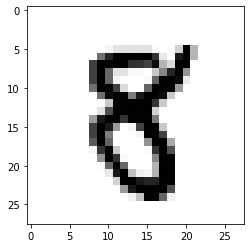

In [35]:
image_index = 5680
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))#img_rows, img_cols, 1))
print(pred.argmax())

In [33]:
count=0
for d in range(len(x_test)):
    pred = model.predict(x_test[d].reshape(1, 28, 28, 1))#img_rows, img_cols, 1))
    if pred.argmax() == y_test[d]:
        count+=1
print(count, "out of", len(x_test))

9866 out of 10000
